## 1. Import libraries

In [142]:
import pandas as pd
import numpy as np


## 2. Import Final Data

In [136]:
final_train_data = pd.read_csv('final_train_data.csv', sep = ',')
final_test_data = pd.read_csv('final_test_data.csv', sep = ',')

In [137]:
final_train_data.head()

,s12,s21,s20,s13,s8,s3,s7,s17,s2,s15,s4,s11,ttf_fixed
0,521.66,23.4190,39.06,2388.02,2388.06,1589.70,554.36,392,641.82,8.4195,1400.60,47.47,13.820275
1,522.28,23.4236,39.00,2388.07,2388.04,1591.82,553.75,392,642.15,8.4318,1403.14,47.49,13.784049
2,522.42,23.3442,38.95,2388.03,2388.08,1587.99,554.26,390,642.35,8.4178,1404.20,47.27,13.747727
3,522.86,23.3739,38.88,2388.08,2388.11,1582.79,554.45,392,642.35,8.3682,1401.87,47.13,13.711309
4,522.19,23.4044,38.90,2388.04,2388.06,1582.85,554.00,393,642.37,8.4294,1406.22,47.28,13.674794


In [138]:
final_test_data.head()

,s12,s21,s20,s13,s8,s3,s7,s17,s2,s15,s4,s11,ttf_fixed
0,521.72,23.3735,38.86,2388.03,2388.04,1585.29,553.90,392,643.02,8.4052,1398.21,47.20,5.477226
1,522.16,23.3916,39.02,2388.06,2388.01,1588.45,554.85,393,641.71,8.3803,1395.42,47.50,5.385165
2,521.97,23.4166,39.08,2388.03,2388.05,1586.94,554.11,393,642.46,8.4441,1401.34,47.50,5.291503
3,521.38,23.3737,39.00,2388.05,2388.03,1584.12,554.07,391,642.44,8.3917,1406.42,47.28,5.196152
4,522.15,23.4130,38.99,2388.03,2388.01,1587.19,554.16,390,642.51,8.4031,1401.92,47.31,5.099020


In [139]:
X_train = final_train_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']]
y_train = final_train_data['ttf_fixed']
X_test = final_test_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']]
y_test = final_test_data['ttf_fixed']                            

## 3. Prepare model

In [143]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load and preprocess sensor data
X_train = np.array(X_train)
y_train = np.array(y_train)

# Build the neural network
model = Sequential()
model.add(Dense(80, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(70, activation='relu'))
#model.add(Dense(50, activation='relu'))


model.add(Dense(1))

## 4. Compile model

In [140]:
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy', 'mae'])

# Train the model
epochs = 20
batch_size = 30
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/20
688/688 [==============================] - 2s 2ms/step - loss: 1627.1309 - accuracy: 0.0051 - mae: 10.0069
Epoch 2/20
688/688 [==============================] - 1s 2ms/step - loss: 11.3047 - accuracy: 0.0048 - mae: 2.7472
Epoch 3/20
688/688 [==============================] - 1s 2ms/step - loss: 10.8776 - accuracy: 0.0048 - mae: 2.6993
Epoch 4/20
688/688 [==============================] - 1s 2ms/step - loss: 11.0140 - accuracy: 0.0048 - mae: 2.7058
Epoch 5/20
688/688 [==============================] - 1s 2ms/step - loss: 11.9149 - accuracy: 0.0048 - mae: 2.8021
Epoch 6/20
688/688 [==============================] - 1s 2ms/step - loss: 13.0905 - accuracy: 0.0048 - mae: 2.9224
Epoch 7/20
688/688 [==============================] - 1s 2ms/step - loss: 14.2434 - accuracy: 0.0048 - mae: 3.0386
Epoch 8/20
688/688 [==============================] - 1s 2ms/step - loss: 16.7338 - accuracy: 0.0047 - mae: 3.2950
Epoch 9/20
688/688 [==============================] - 1s 2ms/step - loss: 14.

## 5. Evaluate model

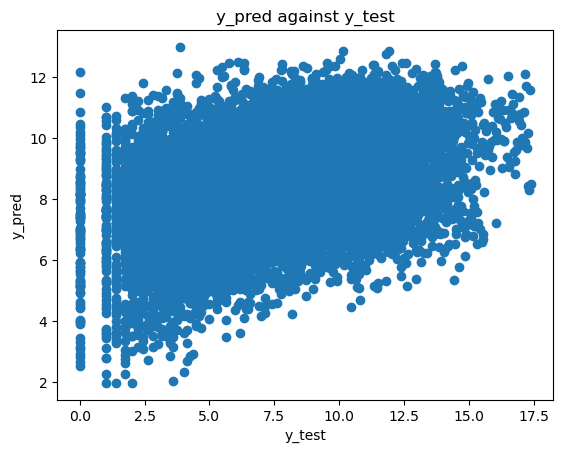

In [141]:
import matplotlib.pyplot as plt
fig = plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred against y_test')
plt.show()